In [224]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

In [222]:
df = pd.read_csv("vehicles1.csv")

In [154]:
df.head()

id                                                url  \
0  7222695916  https://prescott.craigslist.org/cto/d/prescott...   
1  7218891961  https://fayar.craigslist.org/ctd/d/bentonville...   
2  7221797935  https://keys.craigslist.org/cto/d/summerland-k...   
3  7222270760  https://worcester.craigslist.org/cto/d/west-br...   
4  7210384030  https://greensboro.craigslist.org/cto/d/trinit...   

                   region                         region_url  price  year  \
0                prescott    https://prescott.craigslist.org   6000   NaN   
1            fayetteville       https://fayar.craigslist.org  11900   NaN   
2            florida keys        https://keys.craigslist.org  21000   NaN   
3  worcester / central MA   https://worcester.craigslist.org   1500   NaN   
4              greensboro  https://greensboro.craigslist.org   4900   NaN   

  manufacturer model condition cylinders  ... size  type paint_color  \
0          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
1          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
2          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
3          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
4          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   

  image_url description county state lat long posting_date  
0       NaN         NaN    NaN    az NaN  NaN          NaN  
1       NaN         NaN    NaN    ar NaN  NaN          NaN  
2       NaN         NaN    NaN    fl NaN  NaN          NaN  
3       NaN         NaN    NaN    ma NaN  NaN          NaN  
4       NaN         NaN    NaN    nc NaN  NaN          NaN  

[5 rows x 26 columns]

In [155]:
df.shape

(426880, 26)

In [156]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [157]:
df = df[(df['price'] < 100000) & (df['price'] > 100) ]

In [158]:
df['age'] = 2021 - df['year']

In [159]:
df = df[df['age'] >= 1]

In [160]:
df.head()

id                                                url  region  \
27  7316814884  https://auburn.craigslist.org/ctd/d/auburn-uni...  auburn   
28  7316814758  https://auburn.craigslist.org/ctd/d/auburn-uni...  auburn   
29  7316814989  https://auburn.craigslist.org/ctd/d/auburn-uni...  auburn   
30  7316743432  https://auburn.craigslist.org/ctd/d/auburn-uni...  auburn   
31  7316356412  https://auburn.craigslist.org/cto/d/auburn-uni...  auburn   

                       region_url  price    year manufacturer  \
27  https://auburn.craigslist.org  33590  2014.0          gmc   
28  https://auburn.craigslist.org  22590  2010.0    chevrolet   
29  https://auburn.craigslist.org  39590  2020.0    chevrolet   
30  https://auburn.craigslist.org  30990  2017.0       toyota   
31  https://auburn.craigslist.org  15000  2013.0         ford   

                       model  condition    cylinders  ...    type  \
27  sierra 1500 crew cab slt       good  8 cylinders  ...  pickup   
28            silverado 1500       good  8 cylinders  ...  pickup   
29       silverado 1500 crew       good  8 cylinders  ...  pickup   
30      tundra double cab sr       good  8 cylinders  ...  pickup   
31                 f-150 xlt  excellent  6 cylinders  ...   truck   

    paint_color                                          image_url  \
27        white  https://images.craigslist.org/00R0R_lwWjXSEWNa...   
28         blue  https://images.craigslist.org/00R0R_lwWjXSEWNa...   
29          red  https://images.craigslist.org/01212_jjirIWa0y0...   
30          red  https://images.craigslist.org/00x0x_1y9kIOzGCF...   
31        black  https://images.craigslist.org/00404_l4loxHvdQe...   

                                          description county state     lat  \
27  Carvana is the safer way to buy a car During t...    NaN    al  32.590   
28  Carvana is the safer way to buy a car During t...    NaN    al  32.590   
29  Carvana is the safer way to buy a car During t...    NaN    al  32.590   
30  Carvana is the safer way to buy a car During t...    NaN    al  32.590   
31  2013 F-150 XLT V6 4 Door. Good condition. Leve...    NaN    al  32.592   

       long              posting_date   age  
27 -85.4800  2021-05-04T12:31:18-0500   7.0  
28 -85.4800  2021-05-04T12:31:08-0500  11.0  
29 -85.4800  2021-05-04T12:31:25-0500   1.0  
30 -85.4800  2021-05-04T10:41:31-0500   4.0  
31 -85.5189  2021-05-03T14:02:03-0500   8.0  

[5 rows x 27 columns]

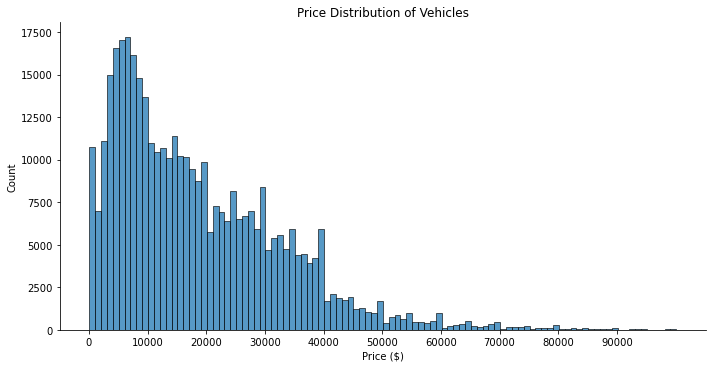

In [162]:
sns.displot(df, x='price', binwidth=1000, height=5, aspect=2)#, bw_adjust=0.4)
plt.xticks(range(0,int(1e5), int(1e4)))
plt.xlabel('Price ($)')
plt.title('Price Distribution of Vehicles')
plt.show()

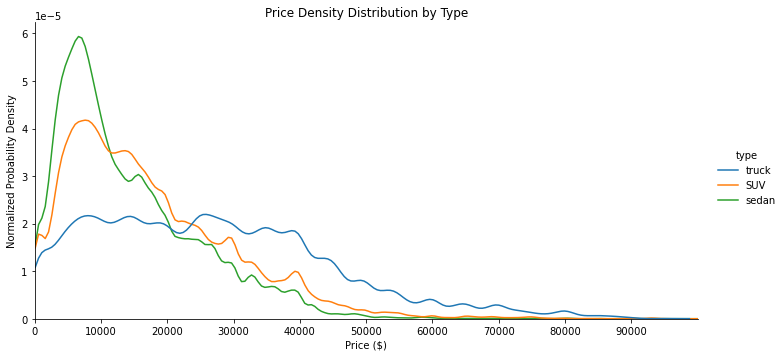

In [163]:
cars_plt = df[df.type.isin(['sedan', 'SUV', 'truck'])]
sns.displot(cars_plt, x='price', hue='type', kind='kde', bw_adjust=0.6, cut=0, common_norm=False, height=5, aspect=2)
plt.xticks(range(0,int(1e5), int(1e4)))
plt.xlabel('Price ($)')
plt.xlim(0,int(1e5))
plt.ylabel('Normalized Probability Density')
plt.title('Price Density Distribution by Type')
plt.show()

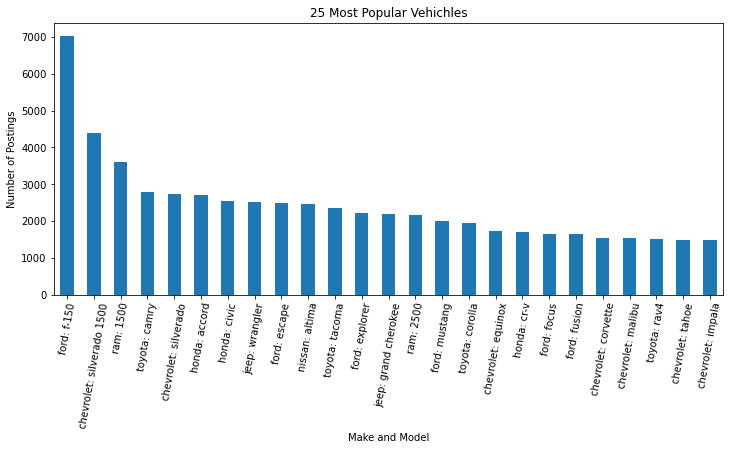

In [164]:
df['make_model'] = df['manufacturer'] + ': ' + df['model']
com_cars = df.make_model.value_counts()[:25]


fig = com_cars.plot.bar(figsize=(12,5))
plt.xlabel('Make and Model')
plt.ylabel('Number of Postings')
plt.title('25 Most Popular Vehichles')
plt.xticks(rotation=80)
plt.show()

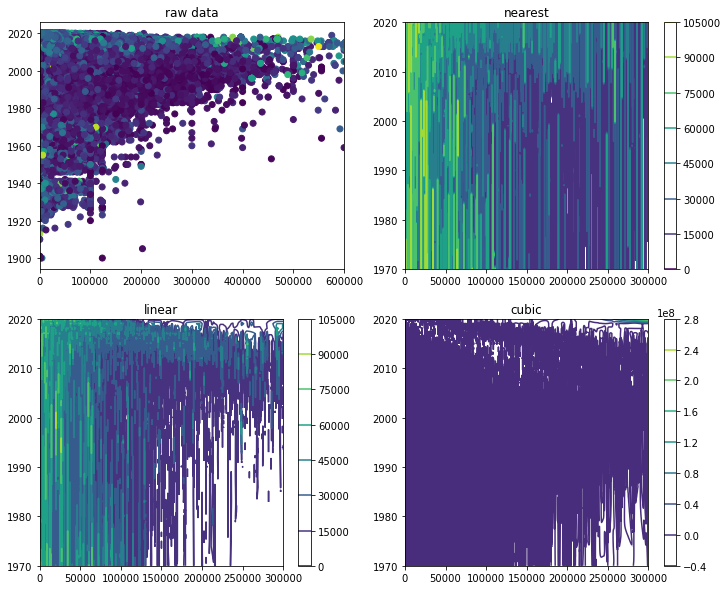

In [165]:
carsd = df.dropna(axis=0, subset=['odometer', 'year'])


from scipy.interpolate import griddata

xs = carsd['odometer']
ys = carsd['year']
zs = carsd['price']
points = np.array([xs, ys]).T 
grid_x, grid_y = np.meshgrid(
    np.linspace(0,3e5,10000),
    np.arange(1970,2021,1))


grid_z0 = griddata(points, zs, (grid_x, grid_y), method='nearest')
grid_z1 = griddata(points, zs, (grid_x, grid_y), method='linear')
grid_z2 = griddata(points, zs, (grid_x, grid_y), method='cubic')


fig, axs = plt.subplots(2, 2, figsize=(12,10))
axs[0,0].scatter(xs, ys, c=zs)
axs[0,0].set_xlim(0,6e5)
axs[0,0].set_title('raw data')


im = axs[0,1].contour(grid_x, grid_y, grid_z0)
fig.colorbar(im, ax=axs[0,1])
axs[0,1].set_title('nearest')

im = axs[1,0].contour(grid_x, grid_y, grid_z1)
fig.colorbar(im, ax=axs[1,0])
axs[1,0].set_title('linear')

im = axs[1,1].contour(grid_x, grid_y, grid_z2)
fig.colorbar(im, ax=axs[1,1])
axs[1,1].set_title('cubic')
plt.show()

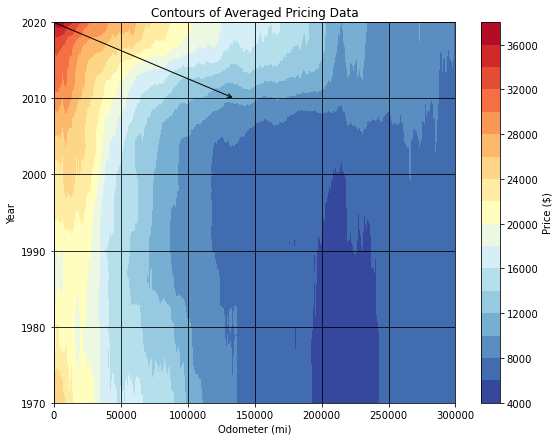

Benchmark Depreciation rate: $0.19/mi


In [166]:
from scipy.signal import convolve2d
sz_o = 500
sz_y = 3
kernel = np.ones((sz_y,sz_o))/(sz_y*sz_o)
grid_z0f = convolve2d(grid_z0, kernel, boundary='symm', mode='same')

fig, ax = plt.subplots(1, figsize=(9,7))
im = ax.contourf(grid_x, grid_y, grid_z0f, levels=15, cmap='RdYlBu_r', zorder=0)
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Price ($)')
ax.set_xlim(0, 3e5)
ax.set_xlabel('Odometer (mi)')
ax.set_ylabel('Year')
ax.set_title('Contours of Averaged Pricing Data')
ax.grid(True, color='k')
ax.annotate("", xy=(1.35e5, 2010), xytext=(0, 2020), arrowprops=dict(arrowstyle="->", color='k'))
plt.show()

xloc_e = np.where((1.349e5<grid_x[0]) & (grid_x[0]<1.36e5))
yloc_e = 40
price_end = grid_z0f[yloc_e,xloc_e[0]]
yloc_s = 50
xloc_s = np.where(grid_x[0]==0)
price_start = grid_z0f[yloc_s,xloc_s[0]]
depr_rate = ((price_start-price_end)/1.35e5)[0]
print('Benchmark Depreciation rate: ${:.2f}/mi'.format(depr_rate))

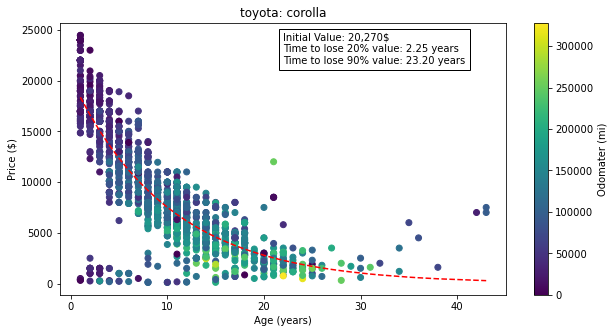

In [167]:
from scipy.optimize import curve_fit
def func(x, a, b):
    return a * np.exp(-b*x)

def plot_depr(data, func, model):
    
    data['make_model'] = data['manufacturer'] + ': ' + data['model']
    df = data[(data['make_model']==model) & (data['age']<=50)].sort_values(by='age')
    xdata = df['age']
    ydata = df['price']
    
    
    popt, _ = curve_fit(func, xdata, ydata, p0=[4e4, 0.1])
    init = popt[0]
    depr20 = -np.log(0.80)/popt[1]
    depr90 = -np.log(0.10)/popt[1]
    
    fig, ax = plt.subplots(figsize=(10,5))
    carplt = ax.scatter(xdata, ydata, c=df['odometer'], cmap='viridis') 
    plt.plot(xdata, func(xdata, *popt), 'r--')
    
    plt.text(0.5, 0.85, 
             'Initial Value: {:,.0f}$\n'
             'Time to lose 20% value: {:.2f} years\n'
             'Time to lose 90% value: {:.2f} years'.format(init, depr20, depr90),
             transform = ax.transAxes, 
            bbox=dict(facecolor='white', edgecolor='black'))
    
    cbar=plt.colorbar(carplt)
    cbar.set_label('Odomater (mi)')
    plt.xlabel('Age (years)')
    plt.ylabel('Price ($)')
    plt.title(model)
    plt.show()
    
plot_depr(df, func, 'toyota: corolla')

In [228]:
stats.ttest_1samp(a=df['price'],popmean=18000)

Ttest_1sampResult(statistic=3.0677003608216173, pvalue=0.002157262973519216)

In [169]:
drop_columns = ['id', 'url', 'region', 'region_url', 'VIN', 'image_url', 'description', 'lat', 'long', 'posting_date']
df.drop(drop_columns, axis=1, inplace=True)

In [170]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [171]:
df[df['price'] == df['price'].min()]

price    year   manufacturer                model condition  \
24699     101  2008.0        mercury        grand marquis       NaN   
28902     101  2008.0        mercury        grand marquis       NaN   
35840     101  2008.0        mercury        grand marquis       NaN   
36038     101  2008.0        mercury        grand marquis       NaN   
36808     101  2004.0     volkswagen            touareg l       NaN   
36814     101  2008.0        mercury        grand marquis       NaN   
36914     101  2014.0         nissan         altima 2.5 s       NaN   
37366     101  2004.0  mercedes-benz              c-class       NaN   
38612     101  2011.0            bmw             3 series       NaN   
38738     101  2014.0         nissan               altima       NaN   
39783     101  2008.0        mercury        grand marquis       NaN   
39834     101  2004.0  mercedes-benz              c-class       NaN   
40600     101  2004.0     volkswagen              touareg       NaN   
46379     101  2008.0        mercury        grand marquis       NaN   
48363     101  2004.0  mercedes-benz              c-class       NaN   
52834     101  2008.0        mercury        grand marquis       NaN   
64097     101  2011.0            bmw        3 series 328i       NaN   
65589     101  2014.0         nissan               altima       NaN   
66433     101  2011.0            bmw             3 series       NaN   
70794     101  2008.0        mercury        grand marquis       NaN   
139984    101  2008.0         toyota                prius      good   
324986    101  2008.0          rover          lr2 4dr hse       NaN   
325474    101  2013.0            kia                  rio       NaN   
326776    101  2003.0           ford  explorer sport trac       NaN   
327046    101  2004.0            ram                 1500       NaN   
327188    101  2013.0          honda                civic       NaN   

          cylinders    fuel  odometer title_status transmission drive size  \
24699   8 cylinders     gas   29300.0        clean    automatic   rwd  NaN   
28902   8 cylinders     gas   29300.0        clean    automatic   rwd  NaN   
35840   8 cylinders     gas   29300.0        clean    automatic   rwd  NaN   
36038   8 cylinders     gas   29300.0        clean    automatic   rwd  NaN   
36808   6 cylinders     gas   52958.0        clean    automatic   4wd  NaN   
36814   8 cylinders     gas   29300.0        clean    automatic   rwd  NaN   
36914   4 cylinders     gas  117332.0        clean    automatic   fwd  NaN   
37366   4 cylinders     gas  140210.0        clean       manual   rwd  NaN   
38612   6 cylinders     gas  101490.0        clean    automatic   rwd  NaN   
38738   4 cylinders     gas  117332.0        clean    automatic   fwd  NaN   
39783   8 cylinders     gas   29300.0        clean    automatic   rwd  NaN   
39834   4 cylinders     gas  140210.0        clean       manual   rwd  NaN   
40600   6 cylinders     gas   52958.0        clean    automatic   4wd  NaN   
46379   8 cylinders     gas   29300.0        clean    automatic   rwd  NaN   
48363   4 cylinders     gas  140210.0        clean       manual   rwd  NaN   
52834   8 cylinders     gas   29300.0        clean    automatic   rwd  NaN   
64097   6 cylinders     gas  101490.0        clean    automatic   rwd  NaN   
65589   4 cylinders     gas  117332.0        clean    automatic   fwd  NaN   
66433   6 cylinders     gas  101490.0        clean    automatic   rwd  NaN   
70794   8 cylinders     gas   29300.0        clean    automatic   rwd  NaN   
139984          NaN  hybrid  100942.0        clean    automatic   fwd  NaN   
324986  6 cylinders     gas  174770.0        clean    automatic   4wd  NaN   
325474  4 cylinders     gas  105085.0        clean    automatic   fwd  NaN   
326776  6 cylinders     gas  149252.0        clean    automatic   rwd  NaN   
327046  8 cylinders     gas  176476.0        clean    automatic   rwd  NaN   
327188  4 cylinders     gas  207301.0        clean    automati

In [172]:
df.sort_values(by='price', ascending=False).head()

price    year manufacturer                       model  condition  \
44134   99999  1997.0      ferrari                 f355 spider  excellent   
77605   99999  2015.0         jeep  wrangler unlimited rubicon        NaN   
80181   99999  2015.0         jeep          wrangler unlimited        NaN   
246133  99999  2020.0         ford        f-150 shelby edition  excellent   
277151  99999  2020.0         ford                       f-150        NaN   

          cylinders fuel  odometer title_status transmission drive size  \
44134   8 cylinders  gas   22000.0        clean       manual   NaN  NaN   
77605   8 cylinders  gas   15944.0        clean    automatic   4wd  NaN   
80181   8 cylinders  gas   15944.0        clean    automatic   4wd  NaN   
246133  8 cylinders  gas    9600.0        clean    automatic   4wd  NaN   
277151          NaN  gas    1404.0        clean    automatic   4wd  NaN   

               type paint_color  county state   age  \
44134   convertible         NaN     NaN    ca  24.0   
77605           SUV         NaN     NaN    co   6.0   
80181           SUV         NaN     NaN    co   6.0   
246133       pickup        blue     NaN    ne   1.0   
277151       pickup       white     NaN    ny   1.0   

                              make_model  
44134               ferrari: f355 spider  
77605   jeep: wrangler unlimited rubicon  
80181           jeep: wrangler unlimited  
246133        ford: f-150 shelby edition  
277151                       ford: f-150

In [173]:
df = df[(df['price'] <= 50000) & (df['price'] >= 1000) ]

In [174]:
df.drop(['year'], axis=1, inplace=True)

C:\Users\vijay\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [175]:
df.drop(columns=['model', 'county', 'state'], inplace=True)

In [176]:
df.drop(['title_status'], axis=1, inplace=True)

In [177]:
df['fuel'].value_counts()

gas         311011
other        25757
diesel       20584
hybrid        4677
electric      1465
Name: fuel, dtype: int64

In [178]:
df.sort_values(by='odometer').head()

price manufacturer  condition    cylinders   fuel  odometer  \
74975   49995          NaN  excellent          NaN    gas       0.0   
66662   20995    chevrolet  excellent  8 cylinders    gas       0.0   
343026  20000         ford        new  8 cylinders    gas       0.0   
270566   6000          NaN        NaN  6 cylinders    NaN       0.0   
350852  29500          NaN        NaN  4 cylinders  other       0.0   

       transmission drive      size   type paint_color   age  \
74975     automatic   NaN       NaN    NaN         NaN   5.0   
66662     automatic   4wd       NaN  truck         NaN   7.0   
343026    automatic   rwd  mid-size  other      custom  88.0   
270566    automatic   NaN       NaN    NaN      yellow  13.0   
350852    automatic   rwd       NaN    NaN      yellow  11.0   

                       make_model  
74975                         NaN  
66662   chevrolet: silverado 1500  
343026             ford: roadster  
270566                        NaN  
350852                        NaN

In [179]:
df = df[df['odometer'] >= 14000]

In [180]:
df.drop(['paint_color'], axis=1, inplace=True)

In [181]:
df = df.drop_duplicates()

In [182]:
df.head()

price manufacturer  condition    cylinders fuel  odometer transmission  \
27  33590          gmc       good  8 cylinders  gas   57923.0        other   
28  22590    chevrolet       good  8 cylinders  gas   71229.0        other   
29  39590    chevrolet       good  8 cylinders  gas   19160.0        other   
30  30990       toyota       good  8 cylinders  gas   41124.0        other   
31  15000         ford  excellent  6 cylinders  gas  128000.0    automatic   

   drive       size    type   age                      make_model  
27   NaN        NaN  pickup   7.0   gmc: sierra 1500 crew cab slt  
28   NaN        NaN  pickup  11.0       chevrolet: silverado 1500  
29   NaN        NaN  pickup   1.0  chevrolet: silverado 1500 crew  
30   NaN        NaN  pickup   4.0    toyota: tundra double cab sr  
31   rwd  full-size   truck   8.0                 ford: f-150 xlt

<AxesSubplot:ylabel='odometer'>

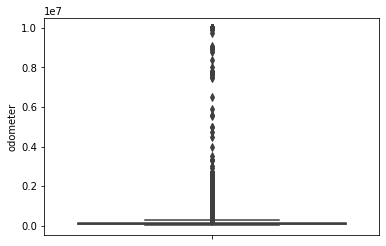

In [183]:
sns.boxplot(data=df, y='odometer')

In [184]:
df[df['odometer'] == df['odometer'].max()]

price manufacturer condition    cylinders   fuel    odometer  \
9218     4000         ford       NaN          NaN    gas  10000000.0   
23100   15000    chevrolet       NaN          NaN    gas  10000000.0   
28738   20000    chevrolet      good  8 cylinders    gas  10000000.0   
44280   16000      porsche      good  4 cylinders    gas  10000000.0   
67001    4350    chevrolet       NaN          NaN    gas  10000000.0   
67003    7800       toyota       NaN          NaN    gas  10000000.0   
81327   15000    chevrolet      good  8 cylinders    gas  10000000.0   
103798   6500          NaN      good  8 cylinders    gas  10000000.0   
108249   1500        mazda       NaN          NaN    gas  10000000.0   
144436   4500         ford      good  4 cylinders    gas  10000000.0   
149788   5000    chevrolet       NaN          NaN    gas  10000000.0   
152394   3500         ford      good          NaN    gas  10000000.0   
191629   7500    chevrolet      fair  8 cylinders    gas  10000000.0   
208157   9000    chevrolet      good  8 cylinders    gas  10000000.0   
260971   4000         jeep      good  8 cylinders    gas  10000000.0   
262338   4800         ford      good  8 cylinders    gas  10000000.0   
292399   1300    chevrolet      fair  8 cylinders    gas  10000000.0   
305172   4500    chevrolet      fair  8 cylinders    gas  10000000.0   
340694  10000        lexus       NaN          NaN    gas  10000000.0   
346469   1700          NaN       NaN          NaN  other  10000000.0   
386655   7000          NaN      fair  4 cylinders    gas  10000000.0   
390252   2000         ford      fair  6 cylinders    gas  10000000.0   
391620  29900    chevrolet       NaN          NaN    gas  10000000.0   
413267   5500    chevrolet       NaN          NaN    gas  10000000.0   

       transmission drive         size       type   age  \
9218         manual   NaN          NaN        NaN  46.0   
23100     automatic   NaN          NaN        NaN  64.0   
28738     automatic   rwd    full-size      truck  70.0   
44280        manual   rwd  sub-compact      coupe  46.0   
67001     automatic   NaN          NaN        NaN  47.0   
67003     automatic   NaN          NaN        NaN  14.0   
81327     automatic   rwd      compact        NaN  48.0   
103798    automatic   rwd          NaN      truck  43.0   
108249    automatic   NaN          NaN        NaN  37.0   
144436    automatic   NaN          NaN      sedan  11.0   
149788       manual   NaN          NaN        NaN  62.0   
152394        other   NaN          NaN        NaN  67.0   
191629    automatic   rwd    full-size      coupe  51.0   
208157    automatic   rwd      compact  hatchback  46.0   
260971       manual   4wd          NaN    offroad  48.0   
262338       manual   rwd    full-size     pickup  72.0   
292399    automatic   rwd    full-size      sedan  71.0   
305172    automatic   rwd    full-size      sedan  26.0   
340694    automatic   NaN          NaN        NaN  15.0   
346469        other   NaN          NaN        NaN  48.0   
386655       manual   rwd          NaN        NaN  54.0   
390252        other   rwd          NaN        NaN  57.0   
391620       manual   NaN          NaN        NaN  53.0   
413267       manual   NaN          NaN        NaN  63.0   

                       make_model  
9218                   ford: f250  
23100            chevrolet: nomad  
28738              chevrolet: coe  
44280                porsche: 914  
67001                         NaN  
67003                         NaN  
81327         chevrolet: corvette  
103798                        NaN  
108249                        NaN  
144436            ford: fusion se  
149788          chevrolet: impala  
152394                  ford: 100  
191629        chevrolet: chevelle  
208157       chevrolet: monza 2+2  
260971                  jeep: cj5  
262338                   ford: f1  
292399                        NaN  
305172  chevrolet: impala ss 1995  
340694              lexus: rx 330  
346469     

In [185]:
df = df[df['odometer'] <= 9999999 ]

<AxesSubplot:ylabel='odometer'>

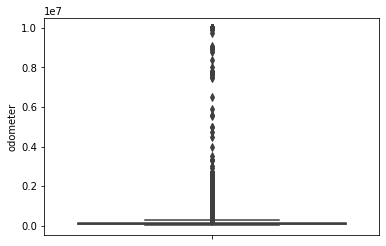

In [186]:
sns.boxplot(data=df, y='odometer')

In [187]:
df['manufacturer'].fillna('other', inplace=True)

In [188]:
df = df.dropna()

In [189]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [190]:
df.head()

price manufacturer  condition    cylinders    fuel  odometer transmission  \
31  15000         ford  excellent  6 cylinders     gas  128000.0    automatic   
55  19900         ford       good  8 cylinders  diesel   88000.0    automatic   
59  14000        honda  excellent  6 cylinders     gas   95000.0    automatic   
65  22500         ford       good  8 cylinders  diesel  144700.0       manual   
73  15000        dodge  excellent  8 cylinders     gas   90000.0    automatic   

   drive       size      type   age                   make_model  
31   rwd  full-size     truck   8.0              ford: f-150 xlt  
55   4wd  full-size    pickup  17.0        ford: f250 super duty  
59   fwd  full-size  mini-van   9.0               honda: odyssey  
65   rwd  full-size     truck  20.0                   ford: f450  
73   rwd   mid-size     sedan   4.0  dodge: charger rt 4dr sedan

In [191]:
from sklearn.preprocessing import LabelEncoder

cat_columns = ['manufacturer', 'condition', 'cylinders', 'fuel', 'transmission', 'drive', 'size', 'type']

le = {}

for col in cat_columns:
    if col in df.columns:
        le[col] = LabelEncoder()
        le[col].fit(list(df[col].astype(str).values))
        df[col] = le[col].transform(list(df[col].astype(str).values))

In [192]:
df.head()

price  manufacturer  condition  cylinders  fuel  odometer  transmission  \
31  15000            13          0          5     2  128000.0             0   
55  19900            13          2          6     0   88000.0             0   
59  14000            16          0          5     2   95000.0             0   
65  22500            13          2          6     0  144700.0             1   
73  15000            10          0          6     2   90000.0             0   

    drive  size  type   age                   make_model  
31      2     1    10   8.0              ford: f-150 xlt  
55      0     1     8  17.0        ford: f250 super duty  
59      1     1     5   9.0               honda: odyssey  
65      2     1    10  20.0                   ford: f450  
73      2     2     9   4.0  dodge: charger rt 4dr sedan

In [195]:
df = df.drop(columns='make_model')
y = df['price']
X = df.drop(columns='price')

In [196]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [197]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [198]:
def model_selection(X_train, y_train, X_test, y_test, models):
    
    from sklearn.metrics import max_error, mean_absolute_error, mean_squared_error, r2_score
    
    R2_result = []
    MSE_result = []
    str_models = []
    
    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        MSE = mean_squared_error(y_test, y_pred)
        R2 = r2_score(y_test, y_pred)       
        R2_result.append(R2)
        MSE_result.append(MSE)  
        str_models.append(str(model))
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))

    ax1.plot(R2_result)
    ax1.set_ylabel('R2_score')


    ax2.plot(str_models,np.sqrt(MSE_result))
    ax2.set_ylabel('RMSE_result')
    ax2.set_xticklabels(str_models, rotation=90)
    plt.tight_layout()
    
    return pd.DataFrame({'models':models, 'R2':R2_result, 'RMSE':np.sqrt(MSE_result)})

In [200]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

C:\Users\vijay\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\vijay\AppData\Local\Temp/ipykernel_22048/3368270882.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(str_models, rotation=90)


models        R2         RMSE
0                                  LinearRegression()  0.258343  7805.706454
1                                             Ridge()  0.258342  7805.709323
2                                             Lasso()  0.258326  7805.794741
3                                     BayesianRidge()  0.258327  7805.788932
4                                               SVR()  0.002994  9050.225747
5                               KNeighborsRegressor()  0.745327  4574.058555
6                             DecisionTreeRegressor()  0.626734  5537.578861
7   (DecisionTreeRegressor(random_state=1956220559...  0.776434  4285.618783
8   (DecisionTreeRegressor(max_features='auto', ra...  0.793266  4121.134721
9   (DecisionTreeRegressor(max_depth=3, random_sta...  0.371734  7184.268381
10  ([DecisionTreeRegressor(criterion='friedman_ms...  0.772928  4319.090323
11                    HistGradientBoostingRegressor()  0.816486  3882.801576
12                                     MLPRegressor()  0.696407  4994.092320
13  XGBRegressor(base_score=0.5, booster='gbtree',...  0.819157  3854.442348

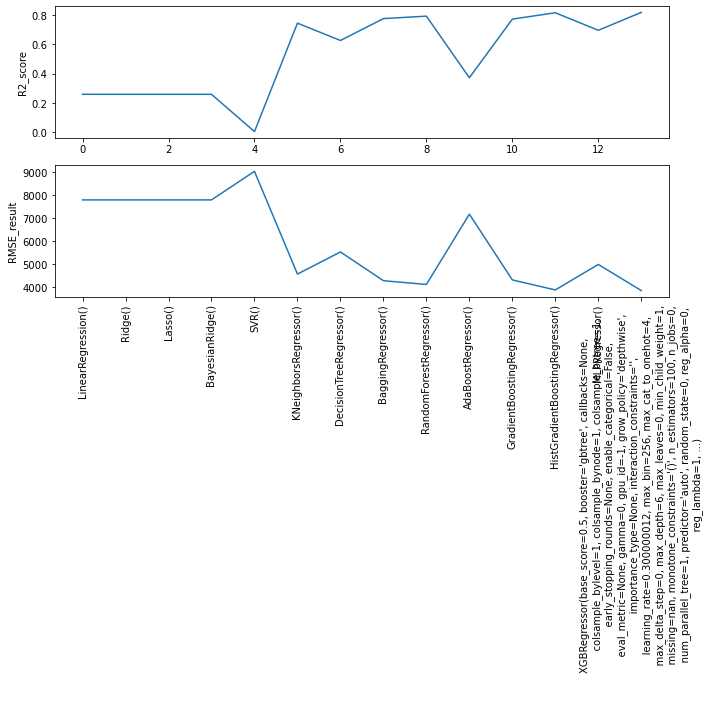

In [201]:
models = [LinearRegression(), Ridge(), Lasso(), BayesianRidge(), SVR(), KNeighborsRegressor(),
          DecisionTreeRegressor(), BaggingRegressor(), RandomForestRegressor(), AdaBoostRegressor(), GradientBoostingRegressor(),
          HistGradientBoostingRegressor(), MLPRegressor(), XGBRegressor()]

model_selection(X_train, y_train, X_test, y_test, models)

In [202]:
def acc_CV(model, X, y):
    from sklearn.model_selection import cross_val_score

    accuracies = cross_val_score(estimator = model, X= X, y=y,  cv=10)
    accuracies.mean()
    accuracies.std()
    print('Accuracy  {:.2f}% +/- {:.2f}%' .format(accuracies.mean()*100, accuracies.std()*100))

In [203]:
rf = RandomForestRegressor()
HGB = HistGradientBoostingRegressor()
XGB = XGBRegressor()

In [204]:
acc_CV(rf, X_train, y_train)

Accuracy  78.77% +/- 0.67%


In [205]:
acc_CV(HGB, X_train, y_train)

Accuracy  80.64% +/- 0.47%


In [206]:
acc_CV(XGB, X_train, y_train)

Accuracy  80.99% +/- 0.47%


In [207]:
def tuning_param(X, y, model, parameters):
    
    from sklearn.model_selection import GridSearchCV   
        
    scores = []
   
    fig, axs = plt.subplots(len(parameters))
    k = 0   
    for parameter in parameters:
        
        clf = GridSearchCV(estimator = model, param_grid = parameter, cv=3, scoring='r2', n_jobs=-1)
        clf.fit(X, y)
        

        for name_param, val_param in parameter.items():
            
            grid_mean_scores = clf.cv_results_['mean_test_score']

            if len(parameters) == 1:
               axs.plot(val_param, grid_mean_scores)
               axs.set_xlabel(name_param)
               axs.set_ylabel('R2') 
            
            else:
                axs[k].plot(val_param, grid_mean_scores)
                axs[k].set_xlabel(name_param)
                axs[k].set_ylabel('R2')
                
                k+=1
            
            
        scores.append({'parameter':name_param,
                       'best_R2':clf.best_score_,
                       'best_value':clf.best_params_})
            
    plt.tight_layout()       
    return pd.DataFrame(scores, columns=['parameter', 'best_R2', 'best_value'])

In [208]:
def model_randomCV(X, y, model, parameters):
    
    from sklearn.model_selection import RandomizedSearchCV
    
    randCV = RandomizedSearchCV(estimator=model, param_distributions=parameters, n_jobs=-1, cv=5)
    
    randCV.fit(X, y)
   
    print('best_parameters: ' + str(randCV.best_params_))
    print('best_score: ' + str(randCV.best_score_))
    print('best_estimator: ' + str(randCV.best_estimator_))    
    
    return pd.DataFrame(randCV.cv_results_).sort_values(by='rank_test_score')

parameter   best_R2             best_value
0  n_estimators  0.804626  {'n_estimators': 120}

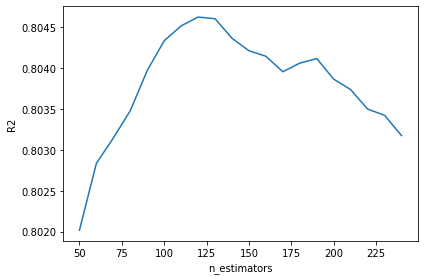

In [209]:
tuning_param(X_train, y_train, XGB, [{'n_estimators': np.arange(50, 250, 10)}])

parameter   best_R2        best_value
0  max_depth  0.805302  {'max_depth': 7}

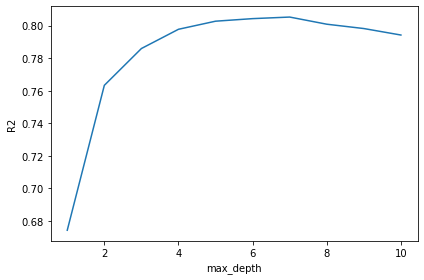

In [211]:
tuning_param(X_train, y_train, XGB, [{'max_depth': np.arange(1, 11, 1)}])

parameter   best_R2    best_value
0       eta  0.807851  {'eta': 0.2}

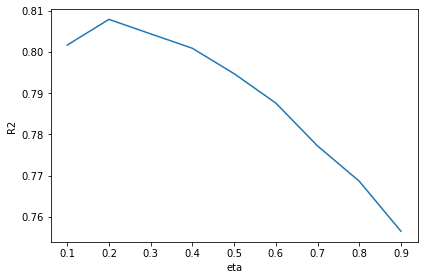

In [210]:
tuning_param(X_train, y_train, XGB, [{'eta': np.arange(0.1, 1, 0.1)}])

parameter   best_R2                    best_value
0       eta  0.807851  {'eta': 0.19999999999999996}

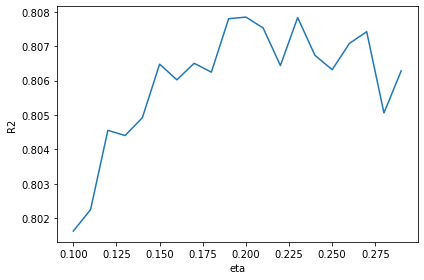

In [212]:
tuning_param(X_train, y_train, XGB, [{'eta': np.arange(0.1, 0.3, 0.01)}])

parameter   best_R2          best_value
0  subsample  0.804211  {'subsample': 0.9}

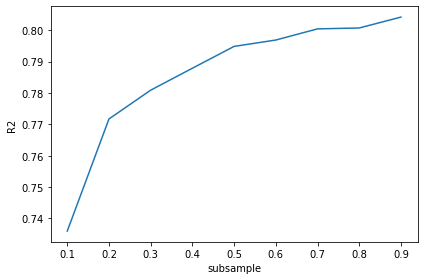

In [213]:
tuning_param(X_train, y_train, XGB, [{'subsample': np.arange(0.1, 1, 0.1)}])

parameter   best_R2                 best_value
0  colsample_bytree  0.807417  {'colsample_bytree': 0.9}

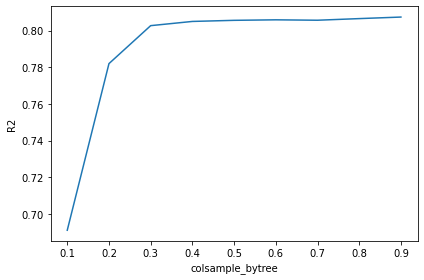

In [214]:
tuning_param(X_train, y_train, XGB, [{'colsample_bytree': np.arange(0.1, 1, 0.1)}])

In [215]:
parameters = {'n_estimators': np.arange(125, 175, 5), 'max_depth': np.arange(4, 9, 1), 'eta': np.arange(0.1, 0.4, 0.1), 
             'subsample': [1], 'colsample_bytree': [1]}

model_randomCV(X_train, y_train, XGB, parameters)

best_parameters: {'subsample': 1, 'n_estimators': 165, 'max_depth': 6, 'eta': 0.2, 'colsample_bytree': 1}
best_score: 0.8128210525434121
best_estimator: XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False, eta=0.2,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.200000003, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=165, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0, ...)


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
5       5.986046      0.180069         0.047270        0.007196   
0       7.264020      0.090985         0.046396        0.012874   
8       4.488251      0.137952         0.029498        0.005768   
4       6.337811      0.259069         0.044048        0.005898   
2       4.719312      0.158141         0.031331        0.005464   
9       3.965909      0.089091         0.020390        0.004549   
7       7.000663      0.299047         0.042917        0.012292   
6       5.977124      0.433604         0.043356        0.010837   
1       3.551734      0.036435         0.028228        0.003880   
3       3.552970      0.043744         0.026291        0.007048   

  param_subsample param_n_estimators param_max_depth param_eta  \
5               1                165               6       0.2   
0               1                170               7       0.2   
8               1                155               5       0.2   
4               1                145               7       0.3   
2               1                150               5       0.2   
9               1                145               5       0.3   
7               1                140               8       0.3   
6               1                160               6       0.4   
1               1                125               5       0.4   
3               1                155               4       0.1   

  param_colsample_bytree                                             params  \
5                      1  {'subsample': 1, 'n_estimators': 165, 'max_dep...   
0                      1  {'subsample': 1, 'n_estimators': 170, 'max_dep...   
8                      1  {'subsample': 1, 'n_estimators': 155, 'max_dep...   
4                      1  {'subsample': 1, 'n_estimators': 145, 'max_dep...   
2                      1  {'subsample': 1, 'n_estimators': 150, 'max_dep...   
9                      1  {'subsample': 1, 'n_estimators': 145, 'max_dep...   
7                      1  {'subsample': 1, 'n_estimators': 140, 'max_dep...   
6                      1  {'subsample': 1, 'n_estimators': 160, 'max_dep...   
1                      1  {'subsample': 1, 'n_estimators': 125, 'max_dep...   
3                      1  {'subsample': 1, 'n_estimators': 155, 'max_dep...   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
5           0.813277           0.811758           0.817292           0.809844   
0           0.811095           0.812565           0.815821           0.809729   
8           0.808532           0.807071           0.809752           0.808332   
4           0.807767           0.808079           0.810191           0.807520   
2           0.808069           0.806889           0.809619           0.808317   
9           0.805693           0.806744           0.811587           0.805630   
7           0.802851           0.809004           0.810101           0.803893   
6           0.803145           0.804309           0.807997           0.802852   
1           0.803327           0.801131           0.810536           0.803099   
3           0.791194           0.790710           0.794094           0.791778   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  
5           0.811934         0.812821        0.002489                1  
0           0.812287         0.812299        0.002026                2  
8           0.806687         0.808075        0.001097                3  
4           0.805717         0.807855        0.001428                4  
2           0.806294         0.807837        0.001161                5  
9           0.808114         0.807554        0.002209                6  
7           0.802221         0.805614        0.003278                7  
6           0.805964         0.804853        0.001915                8  
1           0.804703         0.804559        0.003198                9  
3           0.790671         0.791689        0

In [216]:
XGB.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [217]:
def predicted_price(manufacturer, condition, cylinders, fuel, odometer, transmission, drive, size, type, age):
    
    x = np.zeros(10)
    x[0] = le['manufacturer'].transform([manufacturer])
    x[1] = le['condition'].transform([condition])
    x[2] = le['cylinders'].transform([cylinders])
    x[3] = le['fuel'].transform([fuel])
    x[4] = odometer
    x[5] = le['transmission'].transform([transmission])
    x[6] = le['drive'].transform([drive])
    x[7] = le['size'].transform([size])
    x[8] = le['type'].transform([type])
    x[9] = age
    
    x = scaler.transform([x])
    
    
    return XGB.predict(x)

In [218]:
predicted_price('toyota', 'excellent', '4 cylinders', 'gas', 1000000.0 , 'automatic', 'rwd', 'mid-size', 'sedan', 20)

array([5155.77], dtype=float32)

In [219]:
predicted_price('toyota', 'excellent', '4 cylinders', 'gas', 1000000.0 , 'automatic', 'rwd', 'mid-size', 'sedan', 1)

array([22898.25], dtype=float32)

In [220]:
predicted_price('ford', 'excellent', '4 cylinders', 'gas', 1000000.0 , 'automatic', 'rwd', 'mid-size', 'sedan', 1)

array([17779.16], dtype=float32)